# MILK PRODUCTION

In [1]:
import pandas as pd

In [2]:
xls = pd.read_csv('monthly-milk-production-pounds-p.csv', skipfooter = 2,converters= {'Month': pd.to_datetime})

C:\Users\Jan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
xls

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727
5,1962-06-01,697
6,1962-07-01,640
7,1962-08-01,599
8,1962-09-01,568
9,1962-10-01,577


In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib notebook

In [6]:
import numpy as np

In [7]:
import statsmodels.api as sm

C:\Users\Jan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# DATA TRANSFORMATION

In [8]:
Y=xls['Monthly milk production: pounds per cow. Jan 62 ? Dec 75']

In [9]:
for m in range(1, 13):
    xls['M'+str(m)]=xls['Month'].apply(lambda x: 1 if x.month == m else 0)
    
xls['Year']=xls['Month'].apply(lambda x: x.year)

xls


,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,Year
0,1962-01-01,589,1,0,0,0,0,0,0,0,0,0,0,0,1962
1,1962-02-01,561,0,1,0,0,0,0,0,0,0,0,0,0,1962
2,1962-03-01,640,0,0,1,0,0,0,0,0,0,0,0,0,1962
3,1962-04-01,656,0,0,0,1,0,0,0,0,0,0,0,0,1962
4,1962-05-01,727,0,0,0,0,1,0,0,0,0,0,0,0,1962
5,1962-06-01,697,0,0,0,0,0,1,0,0,0,0,0,0,1962
6,1962-07-01,640,0,0,0,0,0,0,1,0,0,0,0,0,1962
7,1962-08-01,599,0,0,0,0,0,0,0,1,0,0,0,0,1962
8,1962-09-01,568,0,0,0,0,0,0,0,0,1,0,0,0,1962
9,1962-10-01,577,0,0,0,0,0,0,0,0,0,1,0,0,1962


In [10]:
X = xls.as_matrix()[:, 2:15]
X = X.astype(np.int32)
X

array([[   1,    0,    0, ...,    0,    0, 1962],
       [   0,    1,    0, ...,    0,    0, 1962],
       [   0,    0,    1, ...,    0,    0, 1962],
       ..., 
       [   0,    0,    0, ...,    0,    0, 1975],
       [   0,    0,    0, ...,    1,    0, 1975],
       [   0,    0,    0, ...,    0,    1, 1975]])

In [11]:
X=sm.add_constant(X)

# ESTIMATION

In [12]:
model = sm.OLS(Y,X)

In [13]:
results = model.fit()

In [14]:
results.params

const   -36977.074894
x1       -3109.059813
x2       -3146.845527
x3       -3052.631241
x4       -3036.059813
x5       -2973.345527
x6       -2999.988384
x7       -3048.059813
x8       -3088.631241
x9       -3129.488384
x10      -3124.274098
x11      -3153.559813
x12      -3115.131241
x13         20.733150
dtype: float64

In [15]:
xls['fit'] = np.dot(X, results.params.values)

<IPython.core.display.Javascript object>


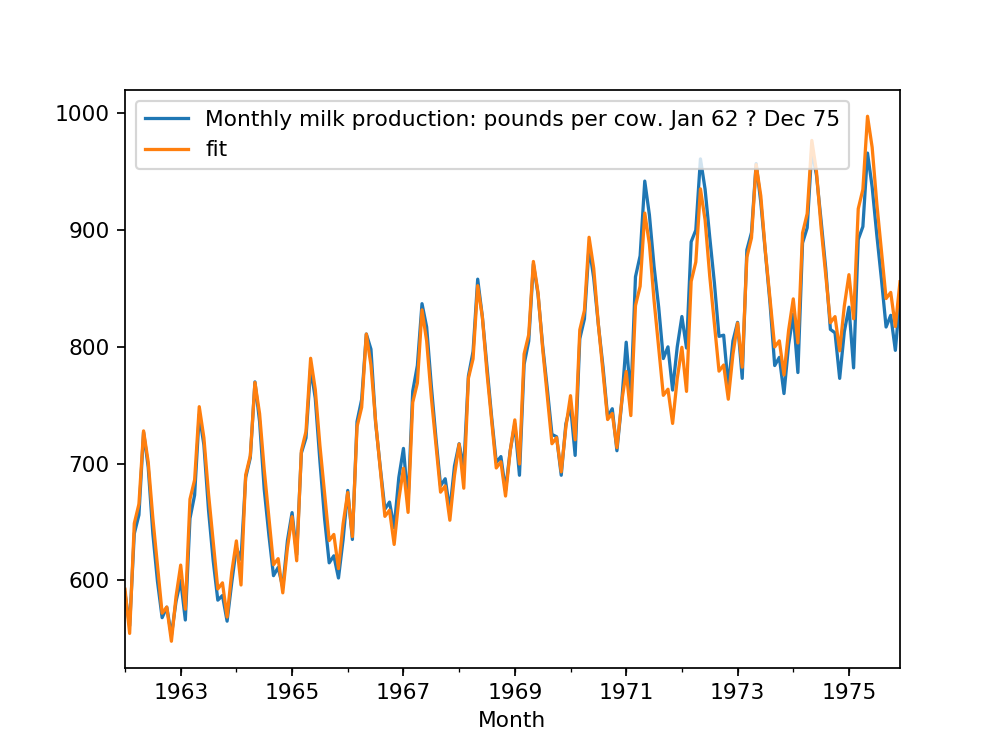

In [18]:
Data= xls.set_index(['Month'])[['Monthly milk production: pounds per cow. Jan 62 ? Dec 75', 'fit']]
Data.resample('1M').mean().plot()

# PREDICTION 2000 - 2010

In [28]:
newXls = pd.read_csv('estimation 2000-2010.csv', converters= {'Month': pd.to_datetime})



In [30]:
for m in range(1, 13):
    newXls['M'+str(m)]=newXls['Month'].apply(lambda x: 1 if x.month == m else 0)
    
newXls['Year']=newXls['Month'].apply(lambda x: x.year)

newX = newXls.as_matrix()[:, 1:14]
newX = newX.astype(np.int32)
newX = sm.add_constant(newX)
newX


array([[  1.00000000e+00,   1.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   2.00000000e+03],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   2.00000000e+03],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   2.00000000e+03],
       ..., 
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   2.01000000e+03],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,   2.01000000e+03],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   1.00000000e+00,   2.01000000e+03]])

<IPython.core.display.Javascript object>


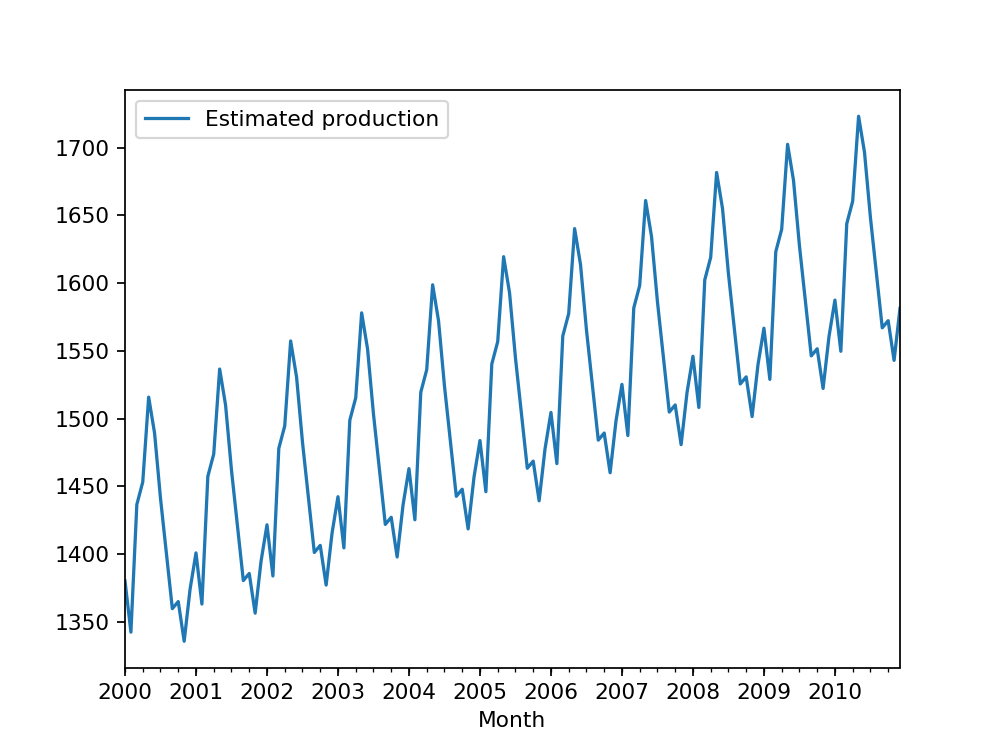

In [34]:
newXls['Estimated production'] = np.dot(newX, results.params.values)
Data= newXls.set_index(['Month'])[['Estimated production']]
Data.resample('1M').mean().plot()